100%|██████████| 30/30 [00:00<00:00, 1174.10it/s]


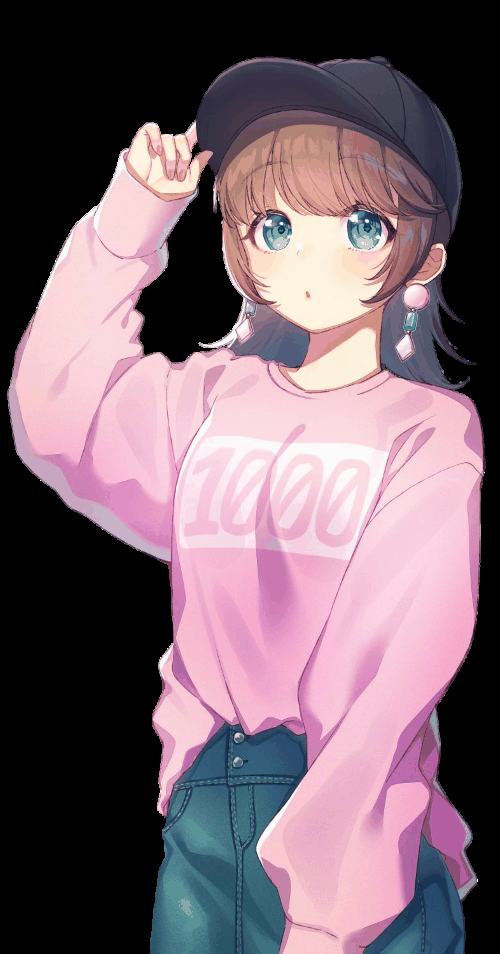

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm

def load_and_process_image(image_path):
    """
    Load the image and create a pencil sketch.
    """
    img = cv2.imread("/content/Pink-Hair-Anime.png")
    if img is None:
        raise FileNotFoundError("The image file was not found. Check the path.")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    inverted_gray = 255 - gray
    blurred_inverted_gray = cv2.GaussianBlur(inverted_gray, (21, 21), 0)
    sketch = cv2.divide(gray, 255 - blurred_inverted_gray, scale=256)

    return img_rgb, sketch

def create_transition_animation(img_rgb, sketch, steps=20, output_path='anime_sketch_transition.gif'):
    """
    Create a transition animation from the original image to the pencil sketch.
    """
    frames = []
    for i in tqdm(range(steps)):
        # Interpolate between original image and sketch
        alpha = i / float(steps - 1)
        blended_image = cv2.addWeighted(img_rgb, 1 - alpha, cv2.cvtColor(sketch, cv2.COLOR_GRAY2RGB), alpha, 0)
        frames.append(blended_image)

    # Save as GIF
    imageio.mimsave(output_path, frames, fps=10)

# Load and process the image
img_rgb, sketch = load_and_process_image(r"/content/Pink-Hair-Anime.png")

# Create and save the transition animation
create_transition_animation(img_rgb, sketch, steps=30, output_path='anime_sketch_transition.gif')

# Display the final transition GIF
from IPython.display import Image
Image(filename='anime_sketch_transition.gif')